# Исследование надёжности заёмщиков

### Содержание


- [**Шаг 1. Общая информация о данных**](#part_1)
    - [1.1. Введение в проект](#101)
    - [1.2. Описание данных](#102)
    - [1.3. Выводы из общей информации о данных](#103)


- [**Шаг 2. Предобработка данных**](#part_2)
    - [2.1. Обработка пропусков](#201)
    - [2.2. Замена типов данных](#202)
    - [2.3. Обработка дубликатов](#203)
    - [2.4. Лемматизация](#204)
    - [2.5. Категоризация данных](#205)


- [**Шаг 3. Исследовательский анализ данных**](#part_3)
    - [3.1. Есть ли зависимость между наличием детей и возвратом кредита в срок?](#301)
    - [3.2. Есть ли зависимость между семейным положением и возвратом кредита в срок?](#302)
    - [3.3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#303)
    - [3.4. Как разные цели кредита влияют на его возврат в срок?](#304)


- [**Шаг 4. Общий вывод**](#part_4)


## Шаг 1. Общая информация о данных


### Введение в проект

Кредитный отдел банка предоставил статистику платежеспособности и демографические данные клиентов. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок — для этого были выдвинуты четыре исследовательских вопроса. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


### Описание данных

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Чтение файла с входными данными и сохранение таблицы в переменную *clients_data*:

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
# запись CSV-файла в переменную clients_data
clients_data = pd.read_csv('/datasets/data.csv')
pd.options.display.float_format = '{:.2f}'.format

Изучу общую информацию для поиска проблем в данных:

In [3]:
# вывод первых 10-ти строк таблицы
clients_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,-4024.80,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,340266.07,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу
5,0,-926.19,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.57,покупка жилья
6,0,-2879.20,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.97,операции с жильем
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.93,образование
8,2,-6929.87,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.83,на проведение свадьбы
9,0,-2188.76,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.94,покупка жилья для семьи


In [4]:
# вывод общей информации о таблице
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# вывод уникальных значений
for column in clients_data.columns:
    print(clients_data[str(column)].value_counts(dropna=False))
    print()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

nan         2174
-1645.46       1
-6620.40       1
-1238.56       1
-3047.52       1
            ... 
-2849.35       1
-5619.33       1
-448.83        1
-1687.04       1
-206.11        1
Name: days_employed, Length: 19352, dtype: int64

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

среднее           

In [6]:
# вывод описательной статистики
clients_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.00,19351.00,21525.00,21525.00,21525.00,21525.00,19351.00
mean,0.54,63046.50,43.29,0.82,0.97,0.08,167422.30
std,1.38,140827.31,12.57,0.55,1.42,0.27,102971.57
min,-1.00,-18388.95,0.00,0.00,0.00,0.00,20667.26
25%,0.00,-2747.42,33.00,1.00,0.00,0.00,103053.15
50%,0.00,-1203.37,42.00,1.00,0.00,0.00,145017.94
75%,1.00,-291.10,53.00,1.00,1.00,0.00,203435.07
max,20.00,401755.40,75.00,4.00,4.00,1.00,2265604.03


### Выводы из общей информации о данных

1. Данные соответствуют описанию и не противоречат друг другу; единственный вопрос к столбцу *days_employed* — непонятен алгоритм расчёта стажа и действительно ли этот стаж в днях.
2. В столбцах *days_employed* и *total_income* есть пропуски — количество строк меньше, чем в остальных; более того, количество пропусков в этих столбцах одинаково, что предполагает неслучайный характер пропусков — например, если у одних и тех же клиентов не указан стаж и ежемесячный доход, они могут быть трудоустроены неофициально и не иметь соответствующих документов. 
3. В столбце *gender* есть один пропуск — похоже, что кто-то из клиентов не захотел указывать его.
4. В столбцах *dob_years* и *children* есть логически невозможные значения — отрицательное количество детей в семье и возраст клиента в годах, равный нулю.
5. Дубликаты встречаются в столбцах *education* — здесь значения в разном регистре; и *purpose* — значения записаны в свободной форме, не категоризованы.
6. Типы данных соответствуют признакам, но *float* можно перевести в *int* для экономии памяти.

## Шаг 2. Предобработка данных

### Обработка пропусков

Можно заметить одинаковое количество пропусков в столбцах *days_employed* и *total_income*. Посмотрю, есть ли какая-то закономерность в этом и зависят ли пропуски от других значений в строке. Для этого выведу таблицу, отфильтрованную по пропускам в одном из двух указанных столбцов. Интересно просмотреть начало и конец таблицы.

In [7]:
# сравнительная таблица с пропусками, первые и последние 10 значений
clients_data[clients_data['days_employed'].isnull() == True].head(10).append(clients_data[clients_data['days_employed'].isnull() == True].tail(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,nan,65,среднее,1,гражданский брак,1,M,пенсионер,0,nan,сыграть свадьбу
26,0,nan,41,среднее,1,женат / замужем,0,M,госслужащий,0,nan,образование
29,0,nan,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,nan,строительство жилой недвижимости
41,0,nan,50,среднее,1,женат / замужем,0,F,госслужащий,0,nan,сделка с подержанным автомобилем
55,0,nan,54,среднее,1,гражданский брак,1,F,пенсионер,1,nan,сыграть свадьбу
65,0,nan,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,nan,операции с коммерческой недвижимостью
67,0,nan,52,высшее,0,женат / замужем,0,F,пенсионер,0,nan,покупка жилья для семьи
72,1,nan,32,высшее,0,женат / замужем,0,M,госслужащий,0,nan,операции с коммерческой недвижимостью
82,2,nan,50,высшее,0,женат / замужем,0,F,сотрудник,0,nan,жилье
83,0,nan,52,среднее,1,женат / замужем,0,M,сотрудник,0,nan,жилье


Хотя таблица отфильтрована только по одному столбцу с пропусками, в этих же строках встречаются пропуски второго столбца — следовательно, они действительно совпадают. Но я не вижу зависимость от остальных данных, они не совпадают.

Оба столбца с пропусками содержат количественные данные, их можно заменить характерными значениями. Однако, наблюдений большое количество, и чтобы не внести сильного искажения в данные, возьму значения не по столбцу полностью, а из группы на основе связанных по смыслу параметров. На мой взгляд, для стажа и уровня дохода подходит группировка по данным о типе занятости: очевидно, что доход у пенсионера, госслужащего и предпринимателя будет различаться между группами больше, чем внутри группы; это же справедливо и для стажа.

В данных о доходе есть выбросы в сторону к максимальным значениям: при среднем в 167 тыс. максимальное значение — более 2 млн. Поэтому я заполню пропуски медианными значениями.

In [8]:
# запись описательной статистики total_income до преобразования
income_statistics_before = clients_data['total_income'].describe()

# замена пропусков в total_income на медианное значение в группе income_type
clients_data['total_income'] = clients_data.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))

# запись описательной статистики total_income после преобразования и сравнение показателей в таблице
income_statistics_after = clients_data['total_income'].describe()
income_merge = pd.DataFrame({ 'before': income_statistics_before, 'after': income_statistics_after })
income_merge

,before,after
count,19351.00,21525.00
mean,167422.30,165225.32
std,102971.57,98043.67
min,20667.26,20667.26
25%,103053.15,107798.17
50%,145017.94,142594.40
75%,203435.07,195549.94
max,2265604.03,2265604.03


Большинство данных о стаже, равно как и квартили — отрицательные, а среднее и максимальное значения — положительные и значительно выше по модулю. Значит, данные не распределены равномерно; для заполнения пропусков также лучше использовать медиану. Как и в случае с доходом, использую группировку по типу занятости.

In [9]:
# запись описательной статистики days_employed до преобразования
employment_statistics_before = clients_data['days_employed'].describe()

# замена пропусков в days_employed на медианное значение в группе income_type
clients_data['days_employed'] = clients_data.groupby('income_type')['days_employed'].apply(lambda x: x.fillna(x.median()))

# запись описательной статистики days_employed после преобразования и сравнение показателей в таблице
employment_statistics_after = clients_data['days_employed'].describe()
employment_merge = pd.DataFrame({ 'before': employment_statistics_before, 'after': employment_statistics_after })
employment_merge

,before,after
count,19351.00,21525.00
mean,63046.50,63550.50
std,140827.31,141150.42
min,-18388.95,-18388.95
25%,-2747.42,-2570.05
50%,-1203.37,-1355.68
75%,-291.10,-316.24
max,401755.40,401755.40


После преобразования количество значений в данных о стаже и доходах сравнялись с остальными столбцами, а среднее и медиана по столбцу *total_income* (нас в данном случае интересует только этот столбец) пропорционально уменьшились.

Кроме пропусков в данных встречались некорректные значения, которые также нужно исправить. Так, в 101 случае возраст клиента равен нулю, что логически невозможно для клиента банка. Данные о возрасте распределены более равномерно, поэтому нули можно заменить средними значениями.

In [10]:
# запись описательной статистики dob_years до преобразования
dob_statistics_before = clients_data['dob_years'].describe()

# замена пропусков в dob_years на среднее в группе income_type
clients_data['dob_years'] = clients_data.groupby('income_type')['dob_years'].apply(lambda x: x.replace(to_replace=0,value=x.mean()))

# запись описательной статистики dob_years после преобразования и сравнение показателей в таблице
dob_statistics_after = clients_data['dob_years'].describe()
dob_merge = pd.DataFrame({ 'before': dob_statistics_before, 'after': dob_statistics_after })
dob_merge

,before,after
count,21525.00,21525.00
mean,43.29,43.50
std,12.57,12.23
min,0.00,19.00
25%,33.00,34.00
50%,42.00,43.00
75%,53.00,53.00
max,75.00,75.00


Минимальное значение стало равно 19 вместо 0, это больше похоже на правду.

Также ошибочным является количество детей, равное -1 и 20; во втором случае это скорее всего ошибка потому, что нет промежуточных значений между 5 и 20, и 20 становится выбросом. А отрицательного количества детей быть, конечно, не может, это опечатка. Заменю их на более вероятные значения.

In [11]:
# замена каждого ошибочного значения в столбце на вероятное верное значение
clients_data.loc[clients_data['children'] == 20, 'children'] = 2
clients_data.loc[clients_data['children'] == -1, 'children'] = 1

# вывод уникальных значений для проверки
clients_data['children'].value_counts(dropna=False)

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Наконец, есть одно некорректное значение в столбце *gender* — его тоже нужно обработать, чтобы в будущих исследованиях можно было сразу обратиться к этим данным. Поскольку пропуск всего один, строку с наблюдением можно удалить, это не внесет значимых изменений в датафрейм.

In [12]:
# вывод строки с пропуском в gender
clients_data[clients_data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.60,24.00,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.16,покупка недвижимости


In [13]:
# удаление строки
clients_data = clients_data.drop(clients_data[clients_data['gender'] == 'XNA'].index)

In [14]:
# вывод общей информации о данных для проверки
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


Итак, были найдены и обработаны пропуски в данных о доходе, стаже, возрасте, поле и количестве детей; число наблюдений сравнялось во всех столбцах. 

Пропуски в *total_income* и *days_employed* совпали при сравнении построчно — это может указывать на неслучайный характер этих пропусков, но выяснить это достоверно не получится без информации про данные о стаже — сейчас принцип распределения этих данных непонятен. Поскольку это количественные данные, их было адекватно заменить характерными значениями, полученными из описательной статистики. Была выбрана медиана, т. к. данные распределены неравномерно, есть выбросы. Для меньшего искажения данных использовалась группировка.

«Скрытые» пропуски в столбцах *dob_years*, *gender* и *children* остались, скорее всего, из-за ошибки ввода данных, они похожи на опечатки. Данные о возрасте количественные и их распределение близко к нормальному, поэтому можно было использовать для замены среднее по столбцу. Выбросы в данных о количестве детей более вероятно появились из-за опечаток при вводе данных, поэтому более адекватно было исправить ошибки вручную. А пропуск в *gender* был всего в одной строчке, так что ее удаление не окажет значительное влияние на остальные данные.

После восстановления пропущенных значений можно перейти к следующим этапам предобработки данных.

### Замена типа данных

Для экономии памяти и более быстрой обработки данных переведу столбцы с типом данных float в int. Таких столбцов три: стаж, доход и возраст (из-за заполнения пропусков средним значением).

In [15]:
# перевод столбцов в int
clients_data['total_income'] = clients_data['total_income'].astype(int)
clients_data['dob_years'] = clients_data['dob_years'].astype(int)

Данные о стаже также можно перевести в положительные значения — с отрицательными неудобно работать при классификации и сравнении. Чтобы удостовериться, что эта процедура не исказит распределение данных, сначала изучу описательную статистику и гистограмму частот.

In [16]:
# вывод сравнительной таблицы с распределением отрицательных, неотрицательных и всех значений о стаже
pd.DataFrame({ 'all': clients_data['days_employed'].describe(), 
              'negative': clients_data[clients_data['days_employed'] < 0]['days_employed'].describe(), 
              'positive': clients_data[clients_data['days_employed'] > 0]['days_employed'].describe() })

,all,negative,positive
count,21524.00,17666.00,3858.00
mean,63553.56,-2283.83,365026.68
std,141152.98,2198.52,19914.85
min,-18388.95,-18388.95,328728.72
25%,-2570.05,-2940.00,348799.95
50%,-1355.58,-1574.20,365213.31
75%,-316.20,-843.28,380759.82
max,401755.40,-24.14,401755.40


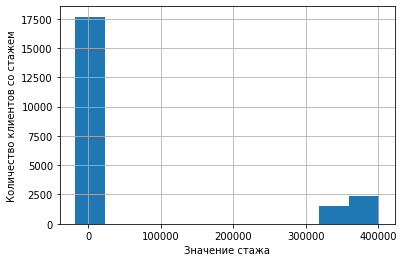

In [17]:
# вывод гистограммы частот по данным о стаже
employment_hist = clients_data['days_employed'].hist()
employment_hist.set_xlabel('Значение стажа')
employment_hist.set_ylabel('Количество клиентов со стажем')
employment_hist

В колонке *positive* квартильные значения сильно отличаются от подобных значений по всем данным. Все положительные значения в *days_employed* — выбросы. Это же можно видеть на гистаграмме: большая часть данных собрана около нуля (и мы знаем, что они отрицательные), а относительно небольшая группа положительных значений сильно отклоняется от медианы.

Чтобы правильно обработать выбросы, нужно знать больше об алгоритме образования этих данных, но перевод в положительные значения не нарушит это распределение.

In [18]:
# перевод days_employed в положительные значения функцией abs() и перевод в int
clients_data['days_employed'] = abs(clients_data['days_employed']).astype(int)

# вывод столбца days_employed для проверки
clients_data['days_employed'].head(10)

0      8437
1      4024
2      5623
3      4124
4    340266
5       926
6      2879
7       152
8      6929
9      2188
Name: days_employed, dtype: int64

Проверяю, получилось ли провести нужные изменения типов данных:

In [19]:
# вывод общей информации для проверки
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


Данные о стаже, доходе и возрасте были представлены типом float и переведены в int, теперь все столбцы с числами стали int с помощью метода .astype() — он позволяет перевести один тип численных данных в другой. Это поможет быстрее обрабатывать данные на следующих этапах.

Данные о стаже переведены в положительные значения, в них обнаружена группа выбросов. Логически стаж не может быть отрицательным, так что это скорее всего была ошибка; в то же время мы не знаем достоверно об использованном алгоритме подсчета стажа, чтобы сделать здесь правильные выводы. Т. к. все данные за пределами группы выбросов были отрицательными, перевод в положительные значения не нарушает их структуру.

### Обработка дубликатов

Важно удалить дубликаты, без этого не получится правильно сделать категоризацию данных. Сейчас известно из общей информации о таблице, что есть дубликаты в *education* из-за ошибки с регистром, а также смысловые повторы в *purpose*.

Сначала обработаю регистр. Кроме *education*, неправильный регистр встречается в *family_status*, его нужно привести к общему виду для удобства. Можно привести к нижнему регистру все столбцы, в которых содержатся текстовые данные типа object.

In [20]:
# цикл for переводит все данные типа object в нижний регистр
# если случится ошибка, цикл проигнорирует ее и продолжится
for column in clients_data.select_dtypes(include=['object']).columns.tolist():
    try:
        clients_data[str(column)] = clients_data[str(column)].str.lower()
    except Exception as ex:
        pass
        print(ex)

Дубликаты также могут быть в виде полных повторов строк, это также нужно проверить. Для этого использую метод .duplicated():

In [21]:
# вывод таблицы дублированных строк
clients_data[clients_data.duplicated()==True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,1574,41,среднее,1,женат / замужем,0,f,сотрудник,0,142594,покупка жилья для семьи
3290,0,365213,58,среднее,1,гражданский брак,1,f,пенсионер,0,118514,сыграть свадьбу
4182,1,1574,34,высшее,0,гражданский брак,1,f,сотрудник,0,142594,свадьба
4851,0,365213,60,среднее,1,гражданский брак,1,f,пенсионер,0,118514,свадьба
5557,0,365213,58,среднее,1,гражданский брак,1,f,пенсионер,0,118514,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,365213,64,среднее,1,женат / замужем,0,f,пенсионер,0,118514,дополнительное образование
21032,0,365213,60,среднее,1,женат / замужем,0,f,пенсионер,0,118514,заняться образованием
21132,0,1574,47,среднее,1,женат / замужем,0,f,сотрудник,0,142594,ремонт жилью
21281,1,1574,30,высшее,0,женат / замужем,0,f,сотрудник,0,142594,покупка коммерческой недвижимости


В данных оказалась 71 строка с полными дубликатами. Их нужно удалить, чтобы не вносить помехи в данные — с помощью метода .drop_duplicates():

In [22]:
# удаление дубликатов
clients_data = clients_data.drop_duplicates()

# проверка результата очистки
clients_data.duplicated().sum()

0

Для того, чтобы найти полные дубликаты, использовал методы .duplicated() и .drop_duplicates(), которые позволили найти все дублированные строки и удалить их. Они могли возникнуть из-за технической ошибки при выгрузке или при ручном вводе данных, когда одного и того же клиента внесли дважды. Но без доступа к исходным данным установить реальную причину дубликатов сложно.

Скрытыми дубликатами были значения в разном регистре, которые были переведены в нижний регистр. Они могли появиться из-за ошибок при ручном вводе данных.

Остались только дубликаты в данных о целях кредита; для анализа этих данных их будет необходимо лемматизировать и категоризировать на следующих этапах.

### Лемматизация

Можно заметить, что данные о цели получения кредита представляют из себя строчку текста в свободной форме и касаются ограниченного количества целей. В пригодный для категоризации вид эти значения поможет привести лемматизация, в процессе которой:
* существительные переводятся в именительный падеж, единственное число;
* прилагательные — в именительный падеж, единственное число, мужской род;
* глаголы, причастия и деепричастия — в инфинитив несовершенного вида.

In [23]:
# загрузка модуля для лемматизации
from pymystem3 import Mystem
m = Mystem()

In [24]:
# создание функции lemmatizer()
# функция принимает строку датафрейма как параметр
# в теле объявляется переменная, которая содержит значение строки в столбце purpose
# к каждому значению применяется функция лемматизации из библиотеки pymystem3
# функция возвращает результат лемматизации

def lemmatizer(row):
    try:
        purpose_value = row['purpose']
        return m.lemmatize(purpose_value)
    except Exception as ex:
        pass
        print(ex)


# применение функции lemmatizer() к строкам датафрейма, запись результата в новый столбец и проверка
clients_data['purpose_lemmas'] = clients_data.apply(lemmatizer, axis=1)
clients_data['purpose_lemmas'].value_counts(dropna=False)

[автомобиль, \n]                                          972
[свадьба, \n]                                             791
[на,  , проведение,  , свадьба, \n]                       768
[сыграть,  , свадьба, \n]                                 765
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           661
[операция,  , с,  , жилье, \n]                            652
[покупка,  , жилье,  , для,  , сдача, \n]                 651
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            624
[покупка

Для лемматизации значений столбца *purpose* написал функцию для строки датафрейма, в которой к нужному значению применяется функция *lemmatize()* из библиотеки *pymystem3*. Результат лемматизации собрал в отдельный столбец *purpose_lemmas*. Вывод списка уникальных значений в новом столбце показал, что лемматизация прошла успешно, и позволил обнаружить 4 общие категории целей: автомобиль, свадьба, жилье и недвижимость.

Лемматизация данных о цели позволит сгруппировать их, чтобы избавиться от смысловых повторов.

### Категоризация данных

С помощью лемм соберу цели получения кредита в более общие категории, из которых можно будет сделать выводы. Для этого использую функцию для строки.

In [25]:
# создание функции для категоризации по леммам (строковая)
def add_purpose_category(row):
    
    '''
    функция принимает строку датафрейма как параметр
    в теле объявляется переменная, которая содержит значение строки в столбце purpose_lemmas
    затем значения поочередно сравнивается с условной конструкцией
    если очередное значение purpose_lemmas содержит в себе название одной из категорий  
    то функция возвращает название этой категории
    если не соответствует ни одному условию, возвращается пустое значение
    '''
    
    purpose_lemmas = row['purpose_lemmas']
    if 'автомобиль' in purpose_lemmas:
        return 'автомобиль'
    if 'свадьба' in purpose_lemmas:
        return 'свадьба'
    if 'жилье' in purpose_lemmas:
        return 'недвижимость'
    if 'недвижимость' in purpose_lemmas:
        return 'недвижимость'
    if 'образование' in purpose_lemmas:
        return 'образование'
    return NaN


# применение функции add_purpose_category() к строкам датафрейма, запись результата в новый столбец и проверка
clients_data['purpose_category'] = clients_data.apply(add_purpose_category, axis=1)
clients_data['purpose_category'].value_counts(dropna=False)

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

In [26]:
# создание функции для категоризации по леммам (числовая)
def add_purpose_id(row):
    
    '''
    функция принимает строку датафрейма как параметр
    в теле объявляется переменная, которая содержит значение строки в столбце purpose_lemmas
    затем значения поочередно сравнивается с условной конструкцией
    если очередное значение purpose_lemmas содержит в себе название одной из категорий  
    то функция возвращает числовое обозначение категории
    если не соответствует ни одному условию, возвращается пустое значение
    '''
    
    purpose_lemmas = row['purpose_lemmas']
    if 'автомобиль' in purpose_lemmas:
        return 0
    if 'свадьба' in purpose_lemmas:
        return 1
    if 'жилье' in purpose_lemmas:
        return 2
    if 'недвижимость' in purpose_lemmas:
        return 2
    if 'образование' in purpose_lemmas:
        return 3
    return NaN


# применение функции add_purpose_id() к строкам датафрейма, запись результата в новый столбец и проверка
clients_data['purpose_id'] = clients_data.apply(add_purpose_id, axis=1)
clients_data['purpose_id'].value_counts(dropna=False)

2    10810
0     4306
3     4013
1     2324
Name: purpose_id, dtype: int64

В результате получилось 4 категории в числовом и текстовом виде, без пропусков. В таком виде данные о цели пригодны для сравнения и анализа.

Данные о доходе сейчас представлены уникальными числовыми значениями, в таком виде их нельзя будет сравнить в обобщенном виде. Поэтому их также необходимо разбить на категории. Ранее выяснилось, что в этих данных есть выбросы — это можно видеть в описательной статистике и гистаграмме частот:

count     21453.00
mean     165317.77
std       98189.24
min       20667.00
25%      107620.00
50%      142594.00
75%      195818.00
max     2265604.00
Name: total_income, dtype: float64


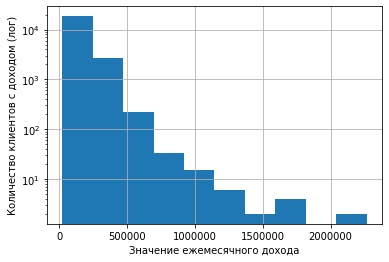

In [27]:
# вывод описательной статистики и гистаграммы частот по данным о доходе
print(clients_data['total_income'].describe())
income_hist = clients_data['total_income'].hist(log=True)
income_hist.set_xlabel('Значение ежемесячного дохода')
income_hist.set_ylabel('Количество клиентов с доходом (лог)')
income_hist

На гистаграмме хорошо видно, что данные распределены ассиметрично. Для избавления от экстремальных значений я возьму данные из межквартильного размаха столбца total_income и уже на их основе сделаю категоризацию. Я решил разделить их на три группы:
* низкий доход — до нижнего квартиля;
* средний доход — внутри межквартильного размаха;
* высокий доход — после верхнего квартиля.

Я думаю, такое разделение адекватно, если мы изучаем доход только внутри группы наших клиентов, а не относительно нормальных значений по стране; кроме того, у нас нет данных о региональной принадлежности клиентов, чтобы взять более точные нормальные значения. Даже при поступлении новых данных функция с квартилями продолжит работать.

В группу с высоким доходом можно включить все данные, а не только отфильтрованные — доход значительно выше среднего легитимно называть высоким; не похоже, что эти экстремальные значения помешают ответить на исследовательский вопрос.

In [28]:
# создание таблицы, в которую записываются значения total_income в пределах межквартильного размаха по этому столбцу
q1 = clients_data['total_income'].quantile(0.25)
q3 = clients_data['total_income'].quantile(0.75)
iqr = q3 - q1
income_filtered = clients_data['total_income'].to_frame().query('(@q1 - 1.5 * @iqr) <= total_income <= (@q3 + 1.5 * @iqr)')


# создание функции для группировки данных о доходе
def income_group(row):
    
    '''
    функция принимает строку датафрейма как параметр
    в теле объявляется переменная, которая содержит значение строки в столбце total_income
    функция возвращает название группы согласно следующим правилам:
    - 'низкий доход' при значении total_income не выше первого квартиля total_income в отфильтрованной таблице
    - 'средний- доход' при значении total_income не выше второго квартиля total_income в отфильтрованной таблице
    - 'средний+ доход' при значении total_income не ниже третьего квартиля total_income в отфильтрованной таблице
    - 'высокий доход' во всех остальных случаях
    '''
    
    income_value = row['total_income']
    if income_value <= income_filtered['total_income'].quantile(0.25):
        return 'низкий доход'
    if income_value <= income_filtered['total_income'].quantile(0.50):
        return 'средний- доход'
    if income_value <= income_filtered['total_income'].quantile(0.75):
        return 'средний+ доход'
    return 'высокий доход'


# применение функции income_group() к строкам датафрейма, запись результата в новый столбец и проверка
clients_data['total_income_group'] = clients_data.apply(income_group, axis=1)
clients_data['total_income_group'].value_counts(dropna=False)

высокий доход     6203
средний- доход    5759
низкий доход      5084
средний+ доход    4407
Name: total_income_group, dtype: int64

В конце проверяю ещё раз, корректны ли типы данных в стобцах и были ли добавлены новые столбцы.

In [29]:
# вывод общей информации для проверки
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21453 entries, 0 to 21524
Data columns (total 16 columns):
children              21453 non-null int64
days_employed         21453 non-null int64
dob_years             21453 non-null int64
education             21453 non-null object
education_id          21453 non-null int64
family_status         21453 non-null object
family_status_id      21453 non-null int64
gender                21453 non-null object
income_type           21453 non-null object
debt                  21453 non-null int64
total_income          21453 non-null int64
purpose               21453 non-null object
purpose_lemmas        21453 non-null object
purpose_category      21453 non-null object
purpose_id            21453 non-null int64
total_income_group    21453 non-null object
dtypes: int64(8), object(8)
memory usage: 2.8+ MB


В результате категоризации получилось разделить данные о целях на 4 категории в числовом и текстовом формате, т. о. избавившись от дубликатов, а также составить 3 категории из данных о доходе, решив проблему с выбросами. В категоризированном виде эти данные можно использовать для сравнения и анализа по группам.

## Шаг 3. Исследовательских анализ данных

Теперь, когда все данные подготовлены для анализа, их можно включить в сводные таблицы. Чтобы не повторять это несколько раз и легко составить таблицы с новыми данными для будущих исследований, напишу функцию для создания сводных таблиц.

In [30]:
# создание функции для формирования сводных таблиц
def debt_pivots(data, index, columns, values, aggfunc):
    
    '''
    функция принимает как параметр аргументы метода pivot_table()
    возвращает готовую таблицу с посчитанными долями должников в соответствующих группах
    '''
    
    try:
    # создание сводной таблицы с полученными параметрами и сброс названия столбца 'debt'
        pivot_table = data.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc).rename_axis('', axis='columns')
    
    # условная конструкция для заполнения пропусков, если в отдельную группу не попало ни одного значения
        if True in pivot_table.isnull():
            pivot_table = pivot_table.fillna(0)
    
    # переименование числовых названий столбцов на текстовые
        pivot_table.columns = ['no_debt', 'with_debt']
    
    # подсчет долей: сколько должников приходится на каждую отдельную группу
        pivot_table['ratio'] = pivot_table['with_debt'] / clients_data[index].value_counts()
    
    # форматирование таблицы: перевод числа клиентов с долгом и без в int, перевод долей в проценты
        pivot_table['no_debt'] = pivot_table['no_debt'].astype(int)
        pivot_table['with_debt'] = pivot_table['with_debt'].astype(int)
        pivot_table['ratio'] = pivot_table['ratio'].map('{:.2%}'.format)
    except Exception as ex:
        pass
        print(ex)
    
    # сброс мультииндекса и возврат готовой таблицы
    pivot_table = pivot_table.reset_index()
    return pivot_table

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [31]:
# создание нового столбца с данными о количестве детей, чтобы сделать сводную таблицу
clients_data['children_id'] = clients_data['children']

# вывод сравнительной таблицы между наличием детей и возвратом кредита в срок
print(debt_pivots(clients_data, 'children', 'debt', 'children_id', 'count'))

   children  no_debt  with_debt  ratio
0         0    13027       1063  7.54%
1         1     4410        445  9.17%
2         2     1926        202  9.49%
3         3      303         27  8.18%
4         4       37          4  9.76%
5         5        9          0  0.00%


Результаты явно показывают, что среди клиентов без детей должников меньше, а среди клиентов с детьми — больше.

Для клиентов с 3-мя и 4-мя детьми тенденция сохраняется, но из-за малочисленности этих групп относительно остальных сложно сделать достоверный вывод. Это же справедливо для клиентов с 5-ю детьми, которых среди должников нет совсем. Можно предположить, что при большем количестве наблюдений в этих группах тенденция сохранится.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
# вывод сравнительной таблицы между семейным положением и возвратом кредита в срок
print(debt_pivots(clients_data, 'family_status', 'debt', 'family_status_id', 'count'))

# количество детей в зависимости от семейного положения
clients_data.groupby('family_status')['children'].sum()

           family_status  no_debt  with_debt  ratio
0              в разводе     1110         85  7.11%
1         вдовец / вдова      896         63  6.57%
2       гражданский брак     3762        388  9.35%
3        женат / замужем    11408        931  7.55%
4  не женат / не замужем     2536        274  9.75%


family_status
в разводе                 519
вдовец / вдова            151
гражданский брак         1920
женат / замужем          7066
не женат / не замужем     654
Name: children, dtype: int64

Клиенты, состоящие в законном браке, вовремя возвращают кредит чаще, чем клиенты в гражданском браке и клиенты вне брака. Такая разница может быть связана с тем, что у клиентов в браке есть дополнительная финансовая нагрузка в отличие от остальных групп: например (вторая таблица), у семейных клиентов чаще есть дети и, вероятно, клиенты в браке чаще входят в число многодетных семей — разница с остальными группами значительная.

Также разведенные и овдовевшие клиенты возвращают кредит в срок чаще, но количество наблюдений в этих группах относительно небольшое, поэтому для них сложно сделать достоверный вывод — в отличие от количества детей, для семейного положения нет прямой зависимости.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [33]:
# вывод границ, по которым доход делится на группы, для сравнения
print(income_filtered['total_income'].quantile([0.25, 0.50, 0.75]))
print()

# вывод сравнительной таблицы между уровнем дохода и возвратом кредита в срок
print(debt_pivots(clients_data, 'total_income_group', 'debt', 'total_income', 'count'))

0.25   105053.00
0.50   142594.00
0.75   183097.00
Name: total_income, dtype: float64

  total_income_group  no_debt  with_debt  ratio
0      высокий доход     5739        464  7.48%
1       низкий доход     4685        399  7.85%
2     средний+ доход     4040        367  8.33%
3     средний- доход     5248        511  8.87%


Клиенты со средним доходом отдают долги реже, а с высоким и низким — чаще. 

Если говорить о причинах такого результата, можно предположить, что клиенты со средним доходом (группы *средний-* и *средний+*) относятся к среднему классу — т. е. это люди, которые обеспечены стабильным и достаточно высоким доходом, а также строящие долгосрочные планы. Они часто берут кредиты, но сильнее зависят от изменений в уровне своего дохода: так, если доход из-за внешних экономических причин обесценивается, это напрямую влияет на способность отдавать кредиты. Этого не происходит с группой высокого дохода, т. к. стоимость приобретаемого товара за кредитные деньги не зависит от уровня дохода; этого не происходит с группой низкого дохода, т. к. они, скорее всего, не могут себе позволить дорогие кредиты.

### Как разные цели кредита влияют на его возврат в срок?

In [34]:
# вывод сравнительной таблицы между целями кредита и его возвратом
print(debt_pivots(clients_data, 'purpose_category', 'debt', 'purpose_id', 'count'))

  purpose_category  no_debt  with_debt  ratio
0       автомобиль     3903        403  9.36%
1     недвижимость    10028        782  7.23%
2      образование     3643        370  9.22%
3          свадьба     2138        186  8.00%


Кредиты на недвижимость и свадьбу отдают чаще, на автомобиль и образование — реже.

## Шаг 4. Общий вывод

Обобщим результаты:
* больше должников среди клиентов: 
    * с детьми, 
    * без брака или в гражданском браке, 
    * с месячным доходом от ~105 до ~182 тысяч рублей, 
    * с целевыми кредитами на автомобиль или образование.
* меньше должников среди клиентов:
    * без детей,
    * в законном браке,
    * с доходом ниже ~105 тысяч или выше ~182 тысяч рублей,
    * с целевыми кредитами на недвижимость или свадьбу.

На самом деле, конечно, это могут быть несколько разных портретов. Один из таких потретов можно составить на основе частотных вариантов в исследуемых группах: женатые клиенты без детей со средним доходом и кредитом на недвижимость, которые чаще возвращают долг вовремя. Можно предположить, что это им позволяет сделать уже накопленный профессиональный стаж и стабильный доход, долгосрочные планы на будущее (официальный брак и недвижимость часто предполагают решение об «оседлости») и отсутствие дополнительной финансовой нагрузки. Получается своего рода портрет представителя среднего класса.

По смыслу пересекается группа клиентов в браке, без детей и с кредитом на свадьбу — вероятно, это молодые семьи.

Интересно также, почему чаще возвращают кредиты клиенты с относительно низким доходом (до ~105 тысяч), ведь в списке целей нет краткосрочных кредитов. Вероятно, здесь может играть роль и региональная принадлежность клиента — доход в 105 тысяч позволяет вести более высокий уровень жизни в регионе, чем в столице, а значит, это частично могут быть региональные представители вышеописанного среднего класса.

Отдельно можно высказать гипотезу, что чем больше детей у клиентов, тем реже они возвращают долги, однако для проверки нужно больше данных о «многодетных» семьях.